In [1]:
import pandas as pd
import re
import nltk
from unidecode import unidecode
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.text import Text
from nltk import FreqDist
from gensim.models import word2vec
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
import numpy as np
from modules import components
from modules import Data_pre_proc
# from cuml.manifold import TSNE

In [4]:
df = pd.read_csv("../data/csv/final_data.csv", encoding='latin-1')

In [7]:
df = pd.read_csv("../data/csv/c_b_t.csv")
df.head()

,Chapter,Book,Text
0,Invocation,Book,"Praise to Válmíki,(2)bird of charming song,(3)..."
1,Canto I. Nárad.,Book I.,"OM.(8) To sainted Nárad, prince of those Wh..."
2,Canto II. Brahmá's Visit,Book I.,"Válmíki, graceful speaker, heard, To highest..."
3,Canto III. The Argument.,Book I.,The hermit thus with watchful heed Received ...
4,Canto IV. The Rhapsodists.,Book I.,"When to the end the tale was brought, Rose i..."


<h3>CHARACTERS<h3>

In [9]:
ch = open("../data/txt/chars.txt", 'r+', encoding='utf-8')
chs = ch.readlines()


In [10]:
c_list = []
characters = []
for line in chs:
    line = line.strip().replace(".", "")
    components = line.split(",")
    charac = components[0]
    occ = components[1:]
    if (bool(re.search('[0-9]+', charac)) == False) and (charac != ""):
        characters.append(charac)
    c_list.append({ "Character": components[0], "Occurences" : occ})
# c_list

<h3>DATA PRE-PROCESSING<h3>

In [5]:

# df['Text'] = df['Text'].apply(lambda x : re.sub("([0-9]*)", '', x))
# df['Text'] = df['Text'].apply(lambda x : x.replace(',', " ").replace('(',"").replace(')',""))
# df['Text'] = df['Text'].apply(lambda x : x.replace(string.punctuation, " "))
# df['Text'] = df['Text'].apply(lambda x: x.lower())
# df['Text'] = df['Text'].apply(lambda x : re.sub("'s", "", (x)))
# df.head()

,Text,Book,Chapter
0,praise to valmiki bird of charming song,BOOK,Invocation
1,who mounts on poesy sublimest spray,BOOK,Invocation
2,and sweetly sings with accent clear and strong,BOOK,Invocation
3,rama aye rama in his deathless lay.,BOOK,Invocation
4,where breathes the man can listen to the strain,BOOK,Invocation


In [3]:
df = Data_pre_proc.pre_proc(df)


In [16]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['thou', 'thy', 'thine', 'thus', 'thee', 'may']
def rem_stp(txt):
    txt = txt.split()
    op = [i for i in txt if i not in stopwords]
    return " ".join(op)
    
df['Text'] = df['Text'].apply(lambda x : rem_stp(x))
df['Text'] = df['Text'].apply(lambda x : re.sub("'s", "", (x)))


In [17]:
df.head()

,Text,Book,Chapter
0,praise valmiki bird charming song,BOOK,Invocation
1,mounts poesy sublimest spray,BOOK,Invocation
2,sweetly sings accent clear strong,BOOK,Invocation
3,rama aye rama deathless lay.,BOOK,Invocation
4,breathes man listen strain,BOOK,Invocation


<h3>VISUALISATION<h3>

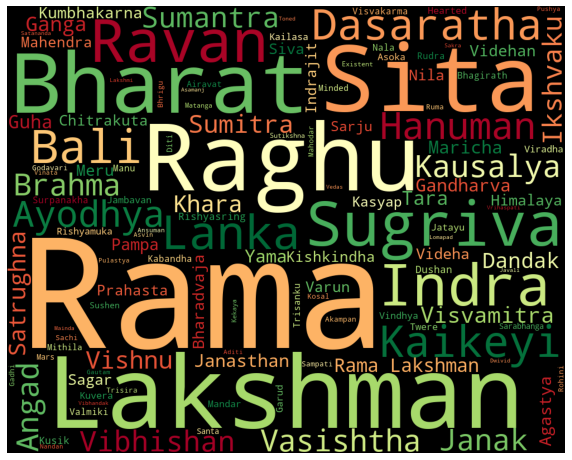

In [73]:
#install wordcloud

text = " "
for string in df.Text:
    text += (string.strip().title() + " ")

wc = WordCloud()
stop_words = list(wc.stopwords)

chars = components.get_char_list()[0]
all_chars = [unidecode(ch.title()) for ch in chars]
words = text.split()
stops = [w for w in words if w not in all_chars]
sto = ['Thou', 'Thy', 'Thine', 'Thus', 'Thee', 'May', 'O', 'Now', 'Twas', 'Won', 'Tis', 'Will']
stop_words = set(stop_words + stops + sto)

w = WordCloud(colormap='RdYlGn',width=1000, height = 800, min_font_size = 10, stopwords = stop_words).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(w)
plt.axis('off')
plt.savefig("../outputs/wordcloud.png")

In [71]:
p = open("../data/txt/proc_data.txt", 'r+', encoding='utf-8')
p.write(text)
p.close()

Well, I really am not sure what some of those words are doing there. I think we need more context. I am guessing Chief refers to clan chiefs..

In [ ]:
tx = open("../data/txt/d.txt", 'r', encoding = 'utf-8')
txt = tx.readlines()
orig_text = ""
for t in txt:
    orig_text += t.lower()

tokzr = nltk.tokenize.WhitespaceTokenizer()
T_orig = Text(tokzr.tokenize(orig_text)) #from original text
T_proc = Text(tokzr.tokenize(text)) #from processed text

# https://stackoverflow.com/questions/42179322/nltk-concordance-not-working

In [ ]:
T_orig.concordance("brahma") #"chief"

Maybe look into making a larger dp with more y labels and MAKE X AXIS CHAPTERS

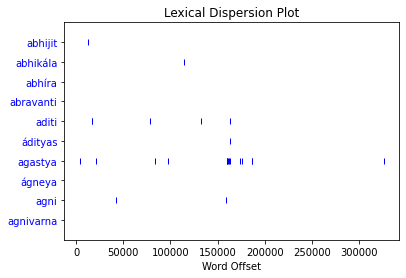

In [47]:
# people = [i.lower() for i in characters]

people = ['rama','lakshman', 'sita', "dasaratha", 'hanuman', 'bharat', 'ayodhya',
                'ravan','vasishtha', "indra"]
d_p = T_orig.dispersion_plot(people[:10])

# len(people) -> 862

OKAY, WHY IS 'WAR' EVERYWHERE? AND 'DEATH'!! I THOUGHT THIS WAS THE RAMAYANA. *sigh*


AND ARROWS! OF COURSE, HOW CAN WE FORGET? (also normalise singular plural)

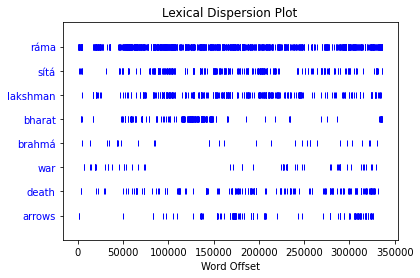

In [87]:
T_orig.dispersion_plot(['ráma', 'sítá', "lakshman", 'bharat', 'brahmá', 'war', 'death', 'arrows'])
#normalise latinised texts

What is Brahma doing here?

In [49]:
f_dist = FreqDist(T_proc)
f_dist.most_common(10)

[('King', 622),
 ('Rama', 614),
 ('Lord', 600),
 ('Son', 568),
 ('Shall', 566),
 ('Like', 488),
 ('Words', 405),
 ('Heart', 390),
 ('Upon', 373),
 ('Love', 353)]

In [50]:
uni_characters = [unidecode(i) for i in characters]
char_occ = []
for item in f_dist:
    if item in uni_characters:
        char_occ.append((item, f_dist[item]))
# char_occ.sort(key=lambda x: x[1], reverse=True)
char_occ[:10]

[('Rama', 614),
 ('Lakshman', 239),
 ('Sita', 181),
 ('Glory', 136),
 ('Sugriva', 131),
 ('Sun', 124),
 ('Bharat', 116),
 ('Indra', 110),
 ('Ravan', 107),
 ('Moon', 99)]

In [51]:
char_occ[0]

('Rama', 614)

In [52]:
T_proc.collocations()

Raghu'S Son; Son Raghu; Fain Would; Needs Must; Suppliant Hands; Palm
Palm; Words Like; Roots Fruit; Thousand Years; Naught Could; God
Rules; Hundred Leagues; West South; None Could; Twice Seven; Old
Ikshvaku'S; Mine Eyes; Reverent Hands; Pride Raghu'S; Indra'S Self


<h3>BOOKS : Dictionary of books<h3>

In [100]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
# import pandas as pd
# import networkx as nx
# import community
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')


In [158]:
book_ends = ['Hail First Bards Valmiki hail more!',
 'Lakshmi side.',
 'Beneath bank cloud.',
 'Burst eyes last.',
 'brake lair disquieted.',
 'healing balm make live.']

ends = [l.title() for l in book_ends]
ends

['Hail First Bards Valmiki Hail More!',
 'Lakshmi Side.',
 'Beneath Bank Cloud.',
 'Burst Eyes Last.',
 'Brake Lair Disquieted.',
 'Healing Balm Make Live.']

In [136]:
text

' Praise Valmiki Bird Charming Song Mounts Poesy\'S Sublimest Spray Sweetly Sings Accent Clear Strong Rama Aye Rama Deathless Lay. Breathes Man Listen Strain Flows Music Valmiki\'S Tongue Feel Feet Path Bliss Attain Rama\'S Glory Saint Sung! Stream Ramayan Leaves Sacred Fount Whole Wide World Sin Stain Free. Prince Hermits Parent Mount Lordly Rama Darling Sea. Glory Whose Fame Ever Bright! Glory Prachetas\'Holy Son! Whose Pure Lips Quaff Ever New Delight Nectar-Sea Deeds Rama Done. Hail Arch-Ascetic Pious Good Kind! Hail Saint Valmiki Lord Every Lore! Hail Holy Hermit Calm Pure Mind! Hail First Bards Valmiki Hail More! Om. Sainted Narad Prince Whose Lore Words Wisdom Flows. Whose Constant Care Chief Delight Scripture Ascetic Rite Good Valmiki First Best Hermit Saints Words Addressed: "In World Pray Virtuous Heroic True? Firm Vows Grateful Mind Every Creature Good Kind? Bounteous Holy Wise Alone Fair Men\'S Eyes? Devoid Envy Firm Sage Whose Tranquil Soul Ne\'Er Yields Rage? Warrior Wrat

In [159]:
# text.index(ends[0])

586

In [167]:
book_end_indices = {}
for i in range(len(ends)):
    book_end_indices.update({i:text.index(ends[i]) + len(ends[i])})
book_end_indices

{0: 621, 1: 197928, 2: 564533, 3: 802565, 4: 979294, 5: 1052785}

In [164]:
text[197928]

' '

In [168]:
book_end_indices[0]

621

In [172]:
#split into books

book_dict = {}
start = 0
for key in book_end_indices:
    str = text[start:book_end_indices[key]]
    book_dict.update({key : str})
    start = book_end_indices[key]
book_dict[0]

" Praise Valmiki Bird Charming Song Mounts Poesy'S Sublimest Spray Sweetly Sings Accent Clear Strong Rama Aye Rama Deathless Lay. Breathes Man Listen Strain Flows Music Valmiki'S Tongue Feel Feet Path Bliss Attain Rama'S Glory Saint Sung! Stream Ramayan Leaves Sacred Fount Whole Wide World Sin Stain Free. Prince Hermits Parent Mount Lordly Rama Darling Sea. Glory Whose Fame Ever Bright! Glory Prachetas'Holy Son! Whose Pure Lips Quaff Ever New Delight Nectar-Sea Deeds Rama Done. Hail Arch-Ascetic Pious Good Kind! Hail Saint Valmiki Lord Every Lore! Hail Holy Hermit Calm Pure Mind! Hail First Bards Valmiki Hail More!"

<h3>Ngrams and Occurences<h3>

In [21]:
def gramify(docu, N):
    split_txt = (docu).strip().replace(".","").split()
    return [split_txt[i: i + N] for i in range(len(split_txt) - N + 1)]


In [36]:
tx = open("../data/txt/d.txt", 'r', encoding = 'utf-8')
txt = tx.read()
txt = unidecode(txt).lower()

In [38]:
grams = gramify(txt, 20)


In [60]:
i = 0
l = ['vibhishan', 'sita']
while i != len(grams):
    if set(l).issubset(grams[i]):
        print(grams[i])
        i += 20
    else:
        i += 1

#ofcourse -20 of the same context: therefore 19 repeated, becuase of window movement

['hand', 'smote', 'ravan', 'down', 'vibhishan', 'there', 'was', 'left', 'to', 'reign', 'over', 'his', "brother's", 'wide', 'domain', 'to', 'meet', 'her', 'husband', 'sita']
['his', 'pride', 'and', 'meghanada', 'fought', 'and', 'died', 'how', 'ravan', 'in', 'the', 'fight', 'was', 'slain,', 'and', 'captive', 'sita', 'brought', 'again', 'vibhishan']
['ceased:', 'vibhishan', 'ill', 'at', 'ease', 'addressed', 'the', 'king', 'in', 'words', 'like', 'these:', '"o', 'ravan,', 'o', 'my', 'lord,', 'beware', 'of', 'sita']
['fate', 'accept', 'at', 'length,', 'thy', 'life', 'to', 'save,', 'the', 'counsel', 'sage', 'vibhishan', 'gave,', 'the', 'prudent', 'counsel', 'spurned', 'before,', 'and', 'sita']
['tears', 'his', 'eyes', 'bedewed', 'his', 'sad', 'looks', 'sought', 'the', 'ground:', 'he', 'sighed', 'and', 'thus', 'to', 'king', 'vibhishan', 'cried:', '"let', 'sita']


<h5>{context , target, freq, book, canto}<h5>

In [1]:
# co_occ_dict = {}
# ch1 = []
# ch2 = [] 
# freq = []
# boo = []
# cant = []
# for boo in range(len(book_dict)):
#     docu = book_dict[boo]
#     grams = gramify(docu, 30)
#     co_list = []
#     for i in range(len(uni_characters)-1):
#         count = 0
#         for n_gram in grams:
#             if (uni_characters[i] in n_gram) and (uni_characters[i+1] in n_gram):
#                 count += 1
#         co_list.append({(uni_characters[i], uni_characters[i+1]) : count})
#     co_occ_dict.update({boo:co_list})
#     #too much space, time, resources - optimize!

In [9]:
import components
components.boot()

{'BOOK 0': "Praise to Válmíki,(2)bird of charming song,(3)Who mounts on Poesy's sublimest spray,And sweetly sings with accent clear and strongRáma, aye Ráma, in his deathless lay.Where breathes the man can listen to the strainThat flows in music from Válmíki's tongue,Nor feel his feet the path of bliss attainWhen Ráma's glory by the saint is sung!The stream Rámáyan leaves its sacred fountThe whole wide world from sin and stain to free.(4)The Prince of Hermits is the parent mount,The lordly Ráma is the darling sea.Glory to him whose fame is ever bright!Glory to him, Prachetas'(5)holy son!Whose pure lips quaff with ever new delightThe nectar-sea of deeds by Ráma done.Hail, arch-ascetic, pious, good, and kind!Hail, Saint Válmíki, lord of every lore!Hail, holy Hermit, calm and pure of mind!Hail, First of Bards, Válmíki, hail once more!",
 'BOOK 1': 'Canto I. Nárad.(7)OM.(8)To sainted Nárad, prince of thoseWhose lore in words of wisdom flows.Whose constant care and chief delightWere Scriptu

# Evolution

In [103]:
canto = "Canto I. Ráma's Speech."
df = pd.read_csv("../data/csv/c_b_t.csv")
chars = components.get_char_list()[0]
i = 0
for idx, row in df.iterrows():
    if row["Chapter"] == canto:
        i = idx
row1 = df.iloc[i]
row0 = df.iloc[i-1] # prev chapter
row2 = df.iloc[i+1] # next chapter

present = [word for word in row1.Text.split() if (word.lower()) in chars]
prev = [word for word in row0.Text.split() if (word.lower()) in chars]
next = [word for word in row2.Text.split() if (word.lower()) in chars]


In [104]:
present

['Ráma', 'Janak', 'Sítá']

In [114]:
df = pd.read_csv("../data/csv/c_b_t.csv")
chars = components.get_char_list()[0]
existing = []
char_evol = {}
for idx, row in df.iterrows():
    old = existing # all chars in prev chapter
    present = []
    for word in row.Text.split():
        if ((word.lower()) in chars) and (unidecode(word) not in present):
            present.append(unidecode(word))
    # present = [word for word in row.Text.split() if ((word.lower()) in chars) and (word not in present)] # all chars in current chapter
    disappearing = [unidecode(word) for word in existing if (unidecode(word) not in present)] # all chars leaving
    new = [unidecode(word) for word in present if (unidecode(word) not in existing)] # new chars appearing
    existing = present
    char_evol[row["Chapter"]] = (present, disappearing, new) 


In [113]:
char_evol["Canto XXVII. The Birth Of Tádaká."]
# present-new+disappearing = old
# old - disappearing = carryover = existing
# ie., existing = present-new

(['Ráma', 'Visvámitra', 'Suketu', 'Tádaká', 'Sunda', 'Márícha', 'Agastya'],
 ['Lakshman', 'Sarjú', 'Gangá', 'Malaja', 'Indra'],
 ['Visvámitra', 'Suketu', 'Tádaká', 'Sunda', 'Agastya'],
 ['Ráma', 'Lakshman', 'Sarjú', 'Gangá', 'Malaja', 'Indra', 'Márícha'])

In [117]:
all_chaps = components.get_all_chaps()

([<matplotlib.axis.XTick at 0x1caec6f5100>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

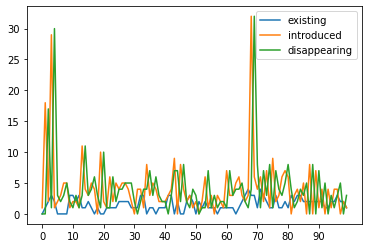

In [131]:
existing = [] # of len range with each element=length of char list at that chapter<=>index
intro =[]
disappearing = []
fro = 0
to = 100
for i in range(fro, to):
    present, dis, new = char_evol[all_chaps[i]]
    exist = [word for word in present if word not in new] 
    existing.append(len(exist))
    intro.append(len(new))
    disappearing.append(len(dis))
plt.plot(existing, label="existing")
plt.plot(intro, label="introduced")
plt.plot(disappearing, label="disappearing")
plt.legend()
labels = [i for i in range(fro, to, 10)]
x = [i for i in range(0, to-fro, 10)]

plt.xticks(x, labels) 



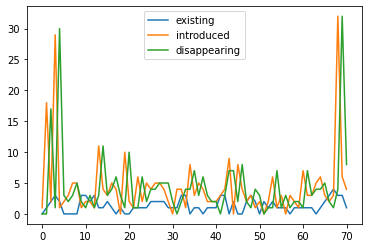

In [132]:
def get_evol_graphs(fro, to, char_evol): #boo_start, boo_end
    existing = [] # of len range with each element=length of char list at that chapter<=>index
    intro =[]
    disappearing = []
    all_chaps = components.get_all_chaps()
    for i in range(fro, to):
        present, dis, new = char_evol[all_chaps[i]]
        exist = [word for word in present if word not in new] 
        existing.append(len(exist))
        intro.append(len(new))
        disappearing.append(len(dis))
    plt.plot(existing, label="existing")
    plt.plot(intro, label="introduced")
    plt.plot(disappearing, label="disappearing")
    plt.legend()
    labels = [i for i in range(fro, to, 10)]
    x = [i for i in range(0, to-fro, 10)]
    plt.xticks(x, labels) 
get_evol_graphs(0, 71, char_evol)